In [1]:
import pandas as pd  # Importing pandas library for data manipulation and analysis
import numpy as np  # Importing numpy library for numerical computing
import re  # Importing re module for regular expressions
import matplotlib.pyplot as plt  # Importing matplotlib library for data visualization
import datetime  # Importing datetime module for date and time manipulation
from datetime import datetime  # Importing datetime class from datetime module
import random  # Importing random module for generating random numbers
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot  # Importing plotly for interactive plots
import plotly.express as px  # Importing plotly express for easy plotting
import plotly.graph_objects as go  # Importing plotly graph objects for advanced plotting
import plotly.figure_factory as ff  # Importing plotly figure factory for creating complex visualizations
from plotly.colors import n_colors  # Importing plotly colors for color management
import seaborn as sns  # Importing seaborn for statistical data visualization
from plotly.subplots import make_subplots  # Importing plotly subplots for creating multiple plots
import squarify  # Importing squarify for tree map plotting
from collections import Counter  # Importing Counter for counting hashable objects
init_notebook_mode(connected=True)  # Initializing plotly notebook mode for offline plotting
from wordcloud import WordCloud , ImageColorGenerator  # Importing wordcloud for creating word clouds
import nltk as nltk  # Importing nltk for natural language processing tasks
import string  # Importing string module for string manipulation
import re  # For regular expressions
import string  # For string operations
import contractions  # For expanding contractions
from nltk.corpus import stopwords  # For accessing stopwords list
from nltk.tokenize import word_tokenize  # Importing word_tokenize for tokenization
from nltk.corpus import stopwords  # Importing stopwords for removing common words
from sklearn.feature_extraction.text import TfidfVectorizer  # Importing TfidfVectorizer for text feature extraction
from textblob import TextBlob  # Importing TextBlob for sentiment analysis
from nltk.corpus import stopwords  # Importing stopwords again (duplicate import)
from textblob import TextBlob  # Importing TextBlob again (duplicate import)
import emoji  # Importing emoji for working with emojis
import contractions  # Importing contractions for expanding contractions in text
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer  # Importing stemmers and lemmatizer for word normalization
from collections import Counter  # Importing Counter again (duplicate import)
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data into train and test sets
from xgboost import XGBClassifier  # Importing XGBoost classifier
from sklearn.metrics import accuracy_score, classification_report  # Importing accuracy_score and classification_report for model evaluation
import squarify

In [2]:
# Libraries required for machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, f1_score, auc
import matplotlib.pyplot as plt
import pandas as pd
import shap
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay,confusion_matrix

## Reading in the saved files and recreating the modeling dataset

In [3]:
# Complete filtered, cleaned and sampled data
appliances_filter_sample_clean_df = pd.read_csv('Appliances_Modeling_2.csv')
appliances_filter_sample_clean_df.shape

(49995, 35)

In [4]:
appliances_filter_sample_clean_df.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'image', 'reviewTime_cleaned', 'review_year', 'review_month',
       'review_day', 'verified_clean', 'vote_clean', 'image_available',
       'helpfulness_binary', 'num_words_review_title', 'title_length',
       'title_sentiment', 'unique_word_count_title',
       'emoji_non_ascii_count_title', 'num_words_review_text', 'review_length',
       'review_sentiment', 'unique_word_count_review', 'url_count_review',
       'stop_word_count_review', 'emoji_non_ascii_count_review',
       'review_age_days', 'review_text_clean', 'sentiment_category'],
      dtype='object')

In [5]:
# Features data
appliances_features_x = pd.read_csv('Appliances_Modeling.csv')
appliances_features_x.shape

(49995, 1008)

In [6]:
# Defining the columns to be taken in modeling dataset
target_column = 'helpfulness_binary'  # Helpfulness is binary (1 or 0)

# Combining features and target variable into 1 modeling file
appliances_modeling_df = pd.concat([appliances_features_x, appliances_filter_sample_clean_df[target_column]], axis = 1)

In [7]:
appliances_modeling_df.shape

(49995, 1009)

## Data split into test and train for testing

In [8]:
# Separating features (X) and target variable (y)
X = appliances_features_x
y = appliances_modeling_df['helpfulness_binary']

# Splitting the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Loading the saved modeling pickle files

In [11]:
import pickle
# Function to load pickle model files
def load_model_pickle(pickle_filename):
    with open(pickle_filename, 'rb') as file:
        loaded_model = pickle.load(file)
    print(f"Model loaded from {pickle_filename}")
    return loaded_model

In [12]:
# XGBoost - base and tuned models
xgb_base_classifier_appliances = load_model_pickle('xgb_base_classifier_appliances.pkl')
xgb_tuned_classifier_appliances = load_model_pickle('xgb_tuned_classifier_appliances.pkl')

Model loaded from xgb_base_classifier_appliances.pkl
Model loaded from xgb_tuned_classifier_appliances.pkl


[12:28:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.



In [13]:
# Logistic regression - base and tuned models
lr_base_classifier_appliances = load_model_pickle('lr_base_classifier_appliances.pkl')
lr_tuned_classifier_appliances = load_model_pickle('lr_tuned_classifier_appliances.pkl')

Model loaded from lr_base_classifier_appliances.pkl
Model loaded from lr_tuned_classifier_appliances.pkl


Trying to unpickle estimator LogisticRegression from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


In [23]:
# Random Forest - base and tuned models
rf_base_classifier_appliances = load_model_pickle('rf_base_classifier_appliances.pkl')
rf_tuned_classifier_appliances = load_model_pickle('rf_tuned_classifier_appliances.pkl')

Model loaded from rf_base_classifier_appliances.pkl
Model loaded from rf_tuned_classifier_appliances.pkl


Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator RandomForestClassifier from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


In [15]:
# SVM - base and tuned models
svm_base_classifier_appliances = load_model_pickle('svm_base_classifier_appliances.pkl')
svm_tuned_classifier_appliances = load_model_pickle('svm_tuned_classifier_appliances.pkl')

Model loaded from svm_base_classifier_appliances.pkl
Model loaded from svm_tuned_classifier_appliances.pkl


Trying to unpickle estimator SVC from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


## Running the models on test data

In [24]:
'''
# Random Forest Classifier - base model
rf_base_predictions = rf_base_classifier_appliances.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_base_predictions)
print("Random Forest base model accuracy:", rf_accuracy)
'''

Random Forest base model accuracy: 0.9195279685312354


In [25]:
# Consolidating all evaluation metrics results in 1 dataframe
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to generate evaluation results
def generate_evaluation_results(models, X_test, y_test):
    results = []
    
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        
        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC AUC': roc_auc
        })
    
    return pd.DataFrame(results)

# Defining the base models to compare
base_models = {
    "Random Forest": rf_base_classifier_appliances,
    "Logistic Regression": lr_base_classifier_appliances,
    "SVM": svm_base_classifier_appliances,
    "XGBoost": xgb_base_classifier_appliances
}

# Defining the tuned models to compare
tuned_models = {
    "Random Forest (Tuned)": rf_tuned_classifier_appliances,
    "Logistic Regression (Tuned)": lr_tuned_classifier_appliances,
    "SVM (Tuned)": svm_tuned_classifier_appliances,
    "XGBoost (Tuned)": xgb_tuned_classifier_appliances
}

# Generating evaluation results for base models
base_evaluation_results = generate_evaluation_results(base_models, X_test, y_test)

# Generating evaluation results for tuned models
tuned_evaluation_results = generate_evaluation_results(tuned_models, X_test, y_test)

# Combining the results of base and tuned models
consolidated_evaluation_results = pd.concat([base_evaluation_results, tuned_evaluation_results], ignore_index=True)

consolidated_evaluation_results

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Random Forest,0.919528,0.285714,0.003331,0.006584,0.501303
1,Logistic Regression,0.918261,0.436548,0.071607,0.123033,0.531781
2,SVM,0.919928,0.000000,0.000000,0.000000,0.500000
3,XGBoost,0.917728,0.424658,0.077435,0.130986,0.534152
4,Random Forest (Tuned),0.959064,0.993277,0.492090,0.658129,0.745900
5,Logistic Regression (Tuned),0.920661,0.526066,0.092423,0.157224,0.542588
6,SVM (Tuned),0.919928,0.000000,0.000000,0.000000,0.500000
7,XGBoost (Tuned),0.927662,0.787129,0.132390,0.226657,0.564637


Random Forest (Tuned) Confusion Matrix:
[[13794     4]
 [  610   591]]
Random Forest (Tuned) F1-Score: 0.6581291759465479
Random Forest (Tuned) AUC: 0.7459000139879569
Random Forest (Tuned) Accuracy: 0.9590639375958397
Random Forest (Tuned) Precision: 0.9932773109243698
Random Forest (Tuned) Recall: 0.492089925062448

Logistic Regression (Tuned) Confusion Matrix:
[[13698   100]
 [ 1090   111]]
Logistic Regression (Tuned) F1-Score: 0.15722379603399436
Logistic Regression (Tuned) AUC: 0.5425877768429676
Logistic Regression (Tuned) Accuracy: 0.9206613774251616
Logistic Regression (Tuned) Precision: 0.5260663507109005
Logistic Regression (Tuned) Recall: 0.09242298084929226

SVM (Tuned) Confusion Matrix:
[[13798     0]
 [ 1201     0]]
SVM (Tuned) F1-Score: 0.0
SVM (Tuned) AUC: 0.5
SVM (Tuned) Accuracy: 0.9199279951996799
SVM (Tuned) Precision: 1.0
SVM (Tuned) Recall: 0.0

XGBoost (Tuned) Confusion Matrix:
[[13755    43]
 [ 1042   159]]
XGBoost (Tuned) F1-Score: 0.22665716322166785
XGBoost (

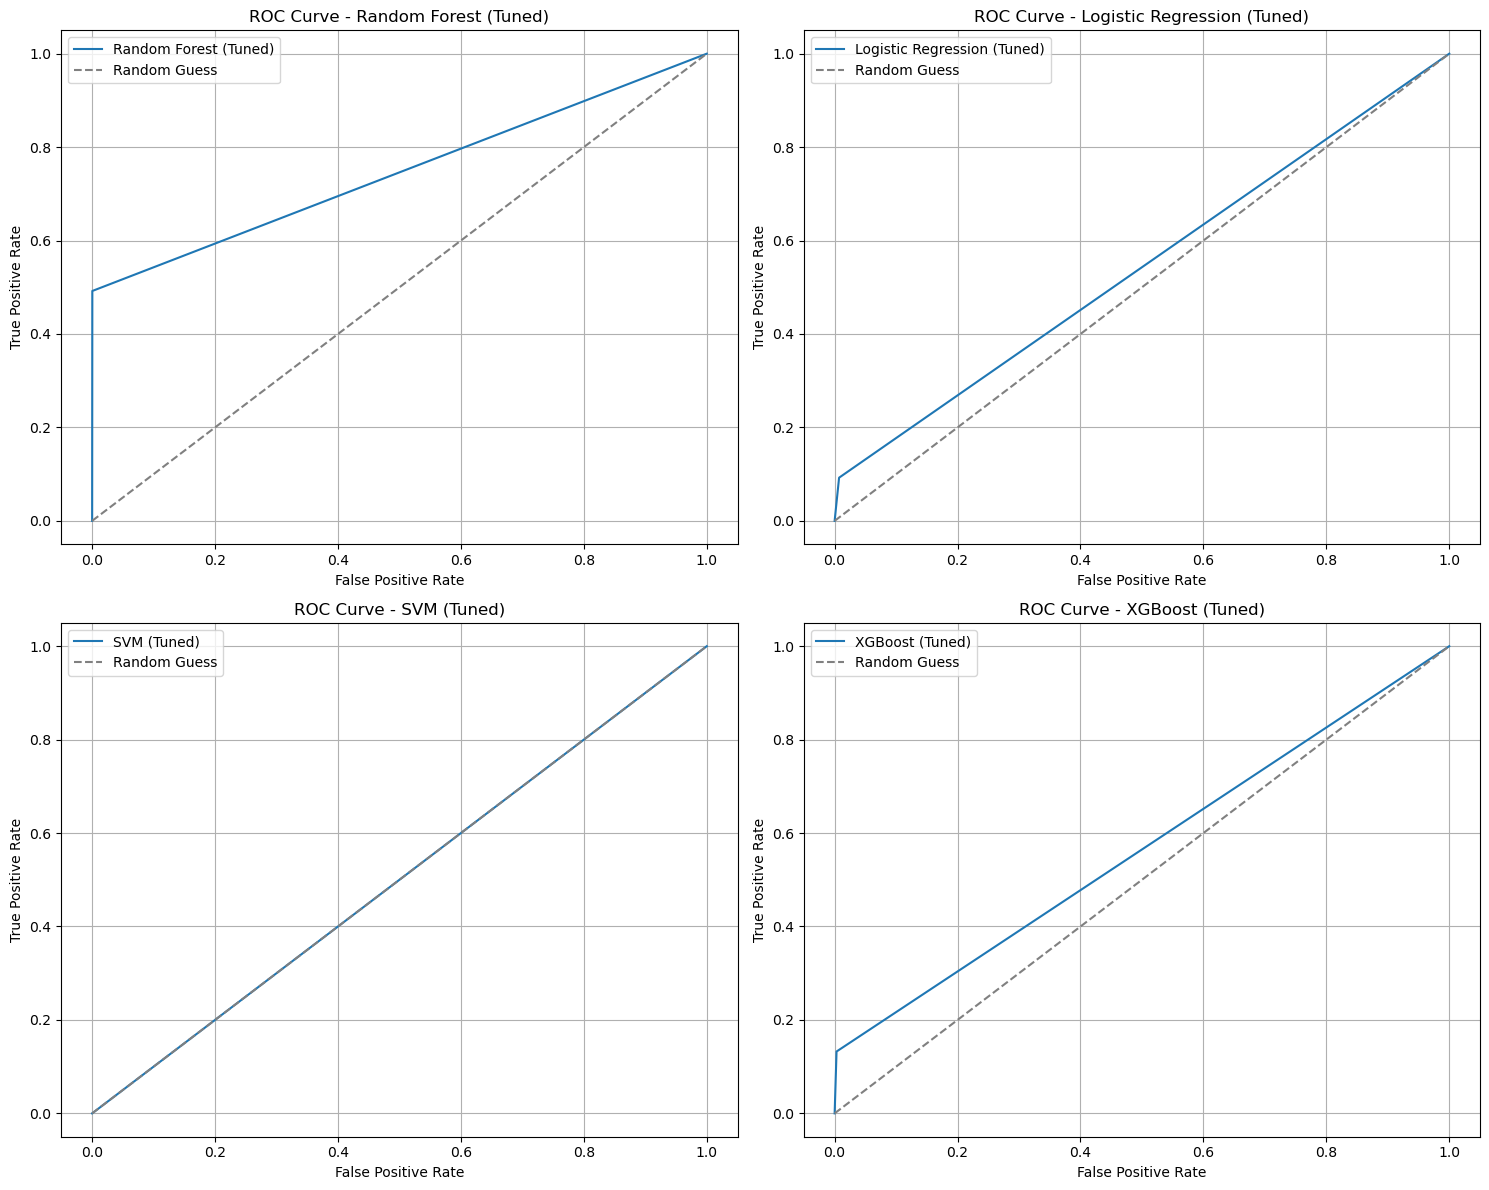

Random Forest Confusion Matrix:
[[13788    10]
 [ 1197     4]]
Random Forest F1-Score: 0.006584362139917696
Random Forest AUC: 0.5013029075760537
Random Forest Accuracy: 0.9195279685312354
Random Forest Precision: 0.2857142857142857
Random Forest Recall: 0.0033305578684429643

Logistic Regression Confusion Matrix:
[[13687   111]
 [ 1115    86]]
Logistic Regression F1-Score: 0.12303290414878397
Logistic Regression AUC: 0.5317811750100987
Logistic Regression Accuracy: 0.9182612174144943
Logistic Regression Precision: 0.4365482233502538
Logistic Regression Recall: 0.07160699417152373

SVM Confusion Matrix:
[[13798     0]
 [ 1201     0]]
SVM F1-Score: 0.0
SVM AUC: 0.5
SVM Accuracy: 0.9199279951996799
SVM Precision: 1.0
SVM Recall: 0.0

XGBoost Confusion Matrix:
[[13672   126]
 [ 1108    93]]
XGBoost F1-Score: 0.13098591549295774
XGBoost AUC: 0.5341518561077346
XGBoost Accuracy: 0.9177278485232349
XGBoost Precision: 0.4246575342465753
XGBoost Recall: 0.07743547044129892



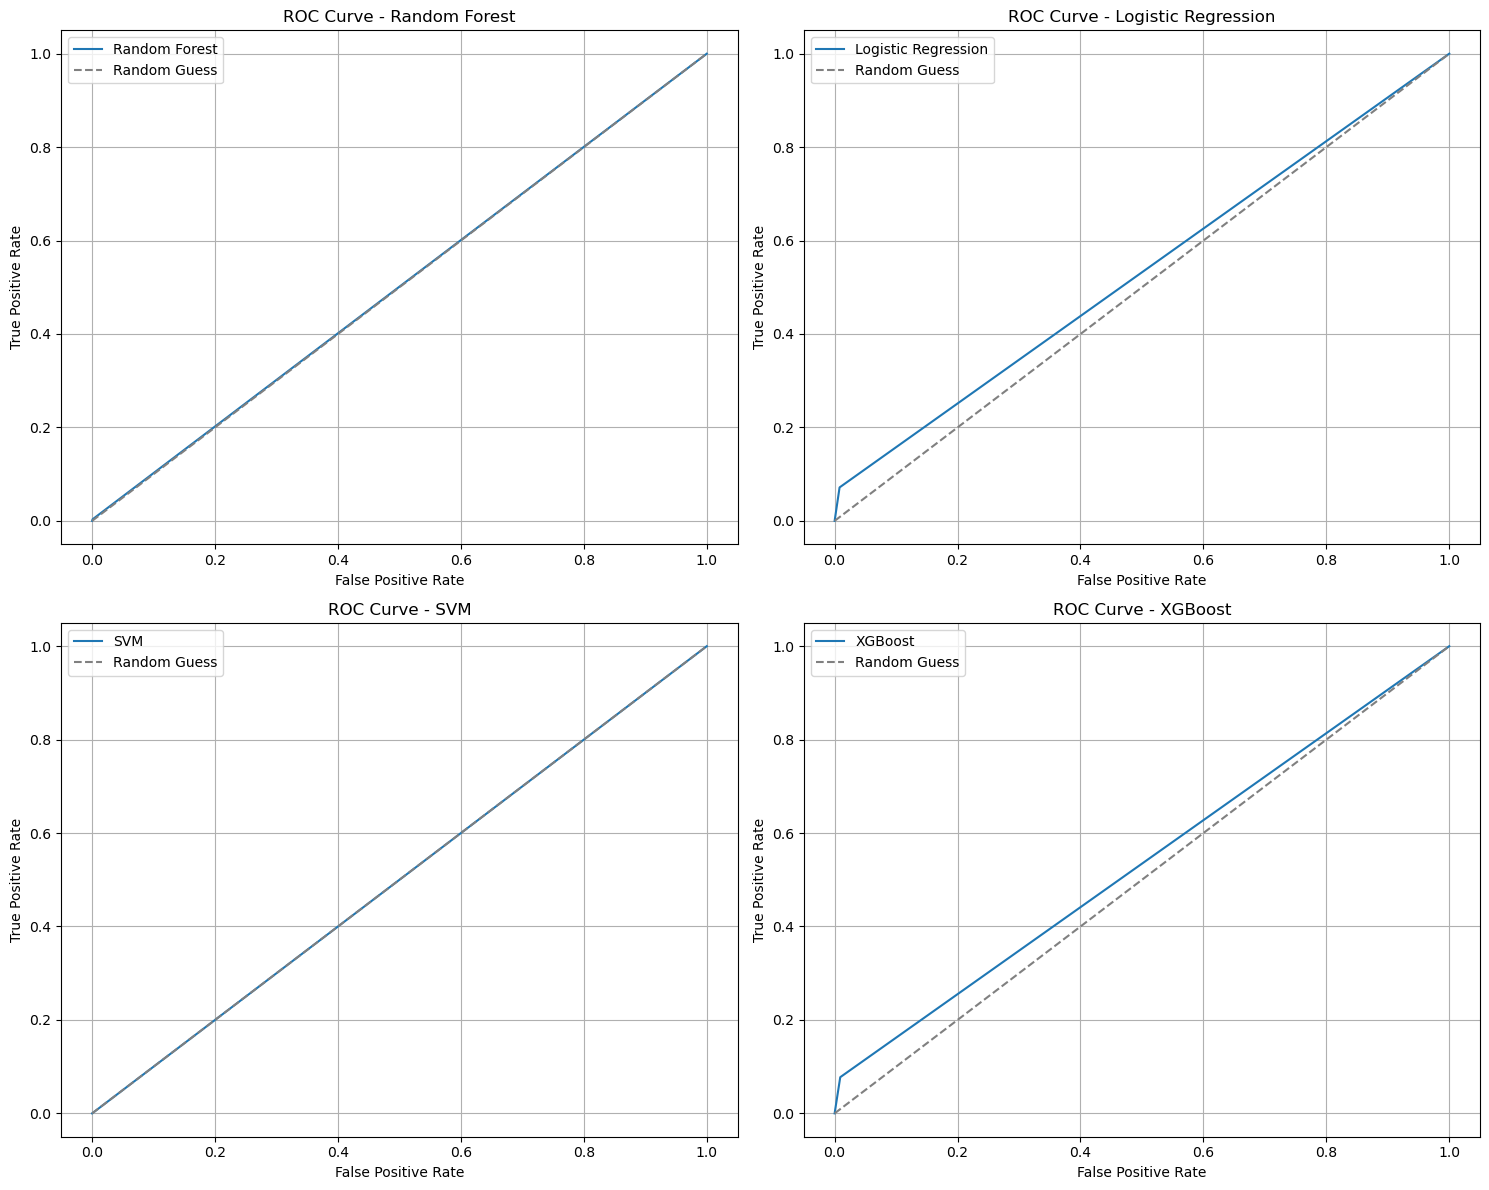

In [27]:
# Function to plot ROC curve
def plot_roc_curve(ax, fpr, tpr, model_name):
    ax.plot(fpr, tpr, label=model_name)
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {model_name}')
    ax.legend()
    ax.grid(True)

# Function to evaluate and compare models
def evaluate_models(models, X_test, y_test):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

    for model_name, model in models.items():
        ax = axes.flatten()[list(models.keys()).index(model_name)]

        # Predictions
        y_pred = model.predict(X_test)

        # Confusion Matrix - raw
        cm = confusion_matrix(y_test, y_pred)
        print(f"{model_name} Confusion Matrix:")
        print(cm)

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        plot_roc_curve(ax, fpr, tpr, model_name)

        # F1-Score
        f1 = f1_score(y_test, y_pred)
        print(f"{model_name} F1-Score: {f1}")

        # Area under ROC curve
        roc_auc = auc(fpr, tpr)
        print(f"{model_name} AUC: {roc_auc}")

        # Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{model_name} Accuracy: {accuracy}")

        # Precision
        precision = precision_score(y_test, y_pred, zero_division=1)
        print(f"{model_name} Precision: {precision}")

        # Recall
        recall = recall_score(y_test, y_pred)
        print(f"{model_name} Recall: {recall}")

        print()

    plt.tight_layout()
    plt.show()

# Defining the base models to compare
base_models = {
    "Random Forest": rf_base_classifier_appliances,
    "Logistic Regression": lr_base_classifier_appliances,
    "SVM": svm_base_classifier_appliances,
    "XGBoost": xgb_base_classifier_appliances
}

# Defining the tuned models to compare
tuned_models = {
    "Random Forest (Tuned)": rf_tuned_classifier_appliances,
    "Logistic Regression (Tuned)": lr_tuned_classifier_appliances,
    "SVM (Tuned)": svm_tuned_classifier_appliances,
    "XGBoost (Tuned)": xgb_tuned_classifier_appliances
}

# Evaluation and comparison of models
evaluate_models(tuned_models, X_test, y_test)
evaluate_models(base_models, X_test, y_test)